In [1]:
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
options(repr.matrix.max.rows = 10)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
# read the dataset and write a short description.
cleveland_data <- read_csv("data/heart_disease/processed.cleveland.data", col_names = FALSE)

#rename the columns
cleveland_data <- rename(cleveland_data, age = X1, sex = X2, cp = X3, trestbps = X4, chol = X5, fbs = X6, restecg = X7, thalach = X8, exang = X9, oldpeak = X10, slope = X11, ca = X12, thal = X13, num = X14)

#select the relevant columns (age, chol, trestbps, num)
cleveland_selected <- select(cleveland_data, age, chol, thalach, num) |> 
    arrange(age)

#wrangle the data, set num to either True/False
cleveland_wrangled <- cleveland_selected |>
    mutate(num = as_factor(num)) |>
    mutate(num = fct_recode(num, "False" = "0", "True" = "1", "True" = "2", "True" = "3", "True" = "4"))
cleveland_wrangled

#split dataset into training + testing
cleveland_split <- initial_split(cleveland_wrangled, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

head(cleveland_train)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,chol,thalach,num
<dbl>,<dbl>,<dbl>,<fct>
29,204,202,False
34,182,174,False
34,210,192,False
35,183,182,False
35,198,130,True
⋮,⋮,⋮,⋮
71,265,130,False
71,149,125,False
74,269,121,False


age,chol,thalach,num
<dbl>,<dbl>,<dbl>,<fct>
34,182,174,False
34,210,192,False
35,183,182,False
37,250,187,False
39,199,179,False
39,220,152,False


In [3]:
cleveland_summarize <- cleveland_train |>
    group_by(num) |>
    summarize(min_age = min(age, na.rm = TRUE), max_age = max(age, na.rm = TRUE), mean_age = mean(age, na.rm = TRUE), min_chol = min(chol, na.rm = TRUE), max_chol = max(chol, na.rm = TRUE), 
              mean_chol = mean(chol, na.rm = TRUE), min_thalach = min(thalach, na.rm = TRUE), max_thalach = max(thalach, na.rm = TRUE), mean_thalach = mean(thalach, na.rm = TRUE)
              )
cleveland_summarize

num,min_age,max_age,mean_age,min_chol,max_chol,mean_chol,min_thalach,max_thalach,mean_thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
False,34,76,53.40650,149,564,244.3008,96,192,156.7724
True,35,77,57.03846,131,409,252.9615,71,195,139.6827


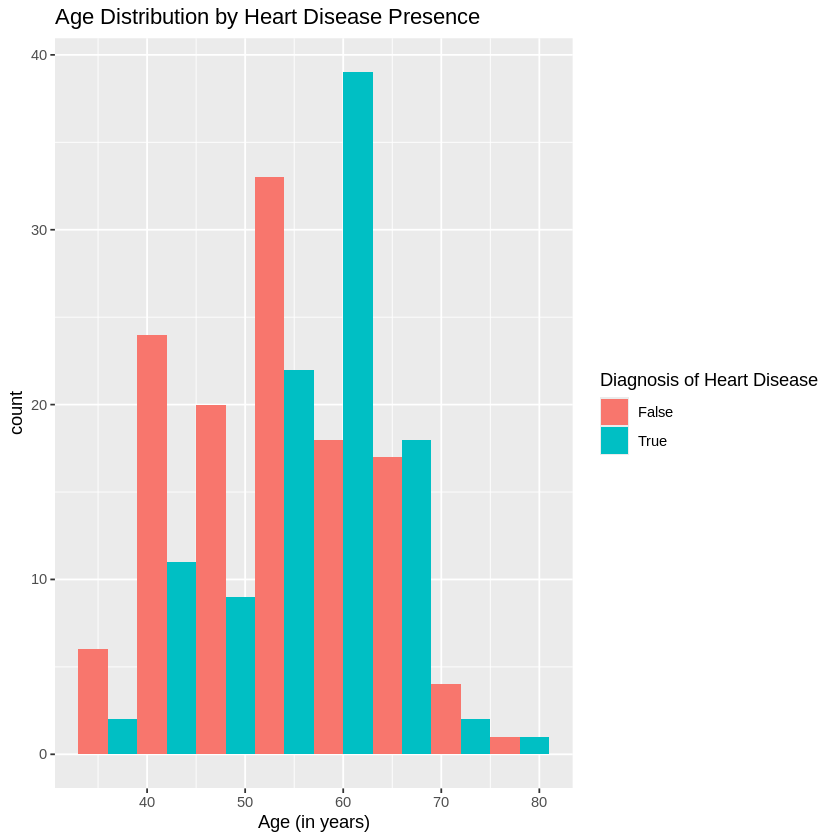

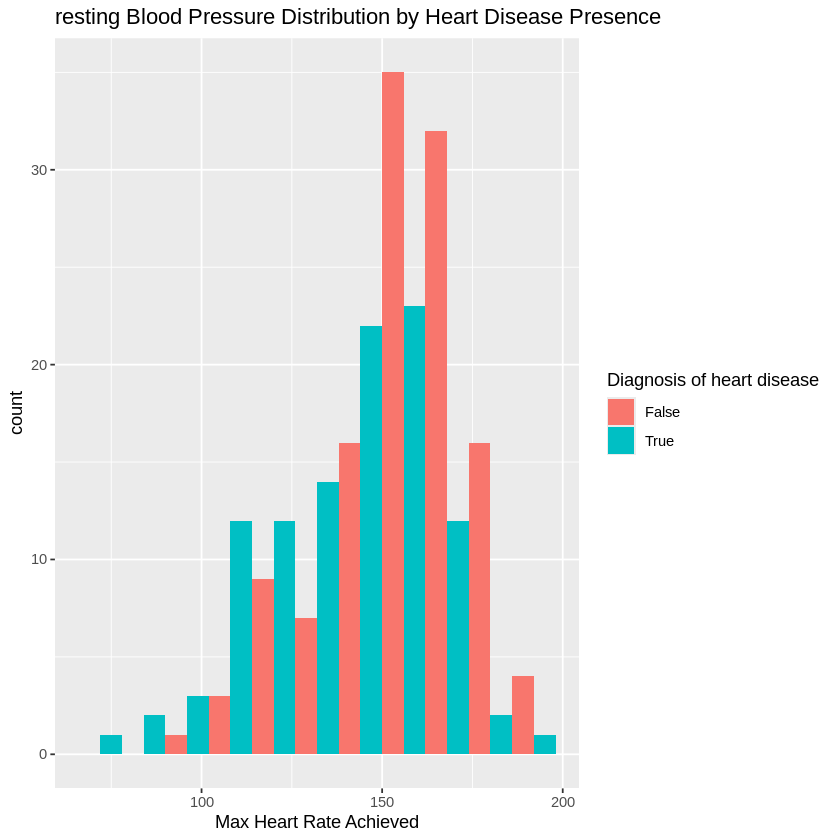

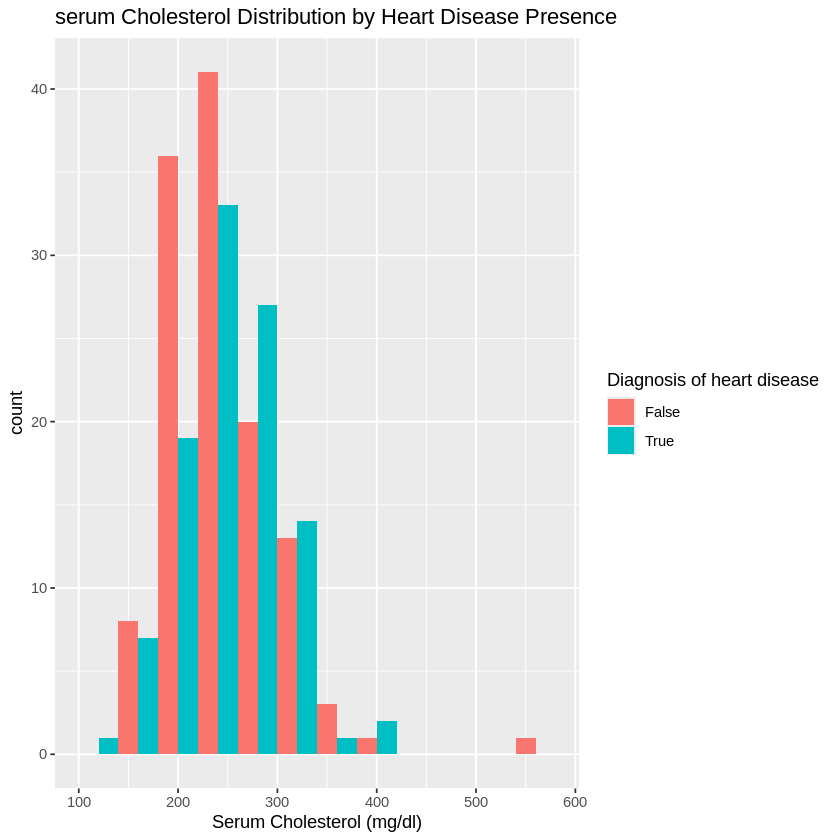

In [4]:
#plotting.
# plot 1: age + chol, plot 2: age + bp, plot 3: chol + bp
set.seed(1234)

cleveland_plot_1 <- ggplot(cleveland_train, aes(x = age, fill = as_factor(num))) + 
    geom_histogram(binwidth = 6, position = "dodge") +
    labs(x = "Age (in years)", fill = "Diagnosis of Heart Disease", 
        title = "Age Distribution by Heart Disease Presence")
cleveland_plot_1

cleveland_plot_2 <- ggplot(cleveland_train, aes(x = thalach, fill = as_factor(num))) +
    geom_histogram(binwidth = 12, position = "dodge") +
    labs(x = "Max Heart Rate Achieved", fill = "Diagnosis of heart disease", 
         title = "resting Blood Pressure Distribution by Heart Disease Presence")
cleveland_plot_2

cleveland_plot_3 <- ggplot(cleveland_train, aes(x = chol, fill = as_factor(num))) +
    geom_histogram(binwidth = 40, position = "dodge") +
    labs(x = "Serum Cholesterol (mg/dl)", fill = "Diagnosis of heart disease", 
        title = "serum Cholesterol Distribution by Heart Disease Presence")
cleveland_plot_3